<a href="https://colab.research.google.com/github/FieryCatalyst/ML-Models/blob/main/Insurance_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

file_path = '/content/insurance.csv'

try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully:")
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Data loaded successfully:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
numerical_cols_to_scale = ['age', 'bmi', 'children', 'charges']
print("Columns to be scaled or normalized:", numerical_cols_to_scale)

Columns to be scaled or normalized: ['age', 'bmi', 'children', 'charges']


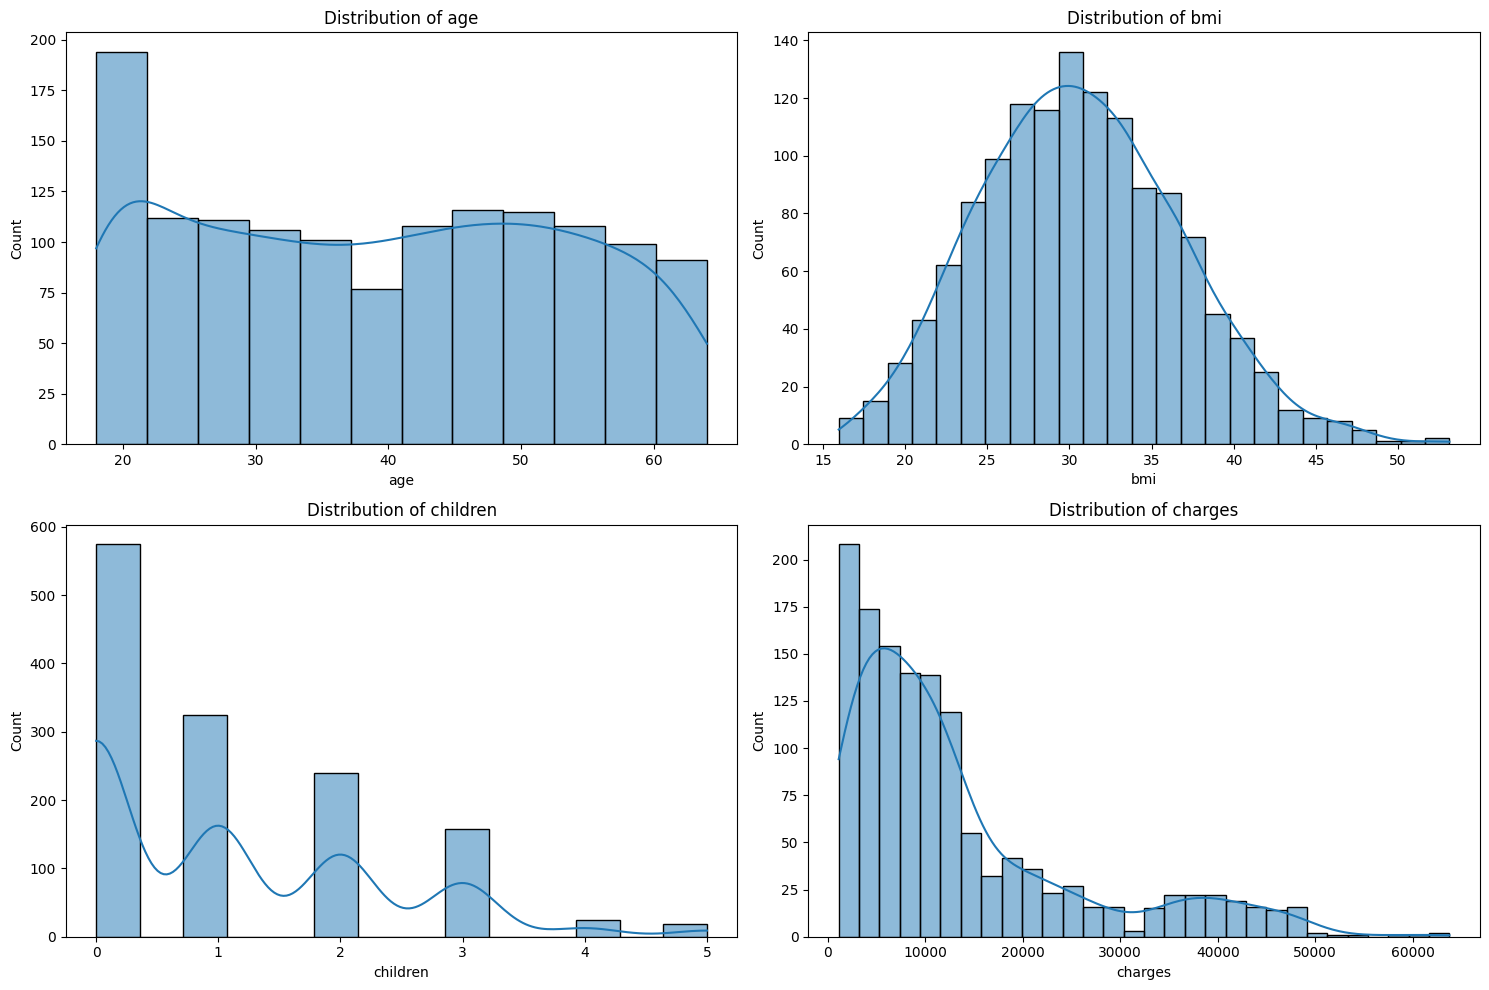

Reasoning for scaling method selection:
- 'age': The distribution appears somewhat uniform, but with a slight right skew. StandardScaler could be used, but MinMaxScaler might be more appropriate if the range of ages is important.
- 'bmi': The distribution is roughly normal, making StandardScaler a suitable choice.
- 'children': This is count data with a clear lower bound of 0 and a small range. MinMaxScaler is generally preferred for such features to preserve the zero values and the relative distances between the small number of unique values.
- 'charges': The distribution is highly skewed to the right. StandardScaler is sensitive to outliers and skewed distributions. While neither is perfect for highly skewed data without transformation, MinMaxScaler might be slightly less affected by the extreme outliers compared to StandardScaler's variance calculation, or a transformation like log scaling could be applied before scaling. For now, let's consider MinMaxScaler as an initial approach d

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_to_scale = ['age', 'bmi', 'children', 'charges']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_to_scale):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

print("Reasoning for scaling method selection:")
print("- 'age': The distribution appears somewhat uniform, but with a slight right skew. StandardScaler could be used, but MinMaxScaler might be more appropriate if the range of ages is important.")
print("- 'bmi': The distribution is roughly normal, making StandardScaler a suitable choice.")
print("- 'children': This is count data with a clear lower bound of 0 and a small range. MinMaxScaler is generally preferred for such features to preserve the zero values and the relative distances between the small number of unique values.")
print("- 'charges': The distribution is highly skewed to the right. StandardScaler is sensitive to outliers and skewed distributions. While neither is perfect for highly skewed data without transformation, MinMaxScaler might be slightly less affected by the extreme outliers compared to StandardScaler's variance calculation, or a transformation like log scaling could be applied before scaling. For now, let's consider MinMaxScaler as an initial approach due to the heavy skew and presence of outliers, or StandardScaler if the model is robust to outliers.")

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Instantiate scalers
bmi_scaler = StandardScaler()
age_children_charges_scaler = MinMaxScaler()

# Apply scaling
df['bmi'] = bmi_scaler.fit_transform(df[['bmi']])
df[['age', 'children', 'charges']] = age_children_charges_scaler.fit_transform(df[['age', 'children', 'charges']])

# Display the first few rows of the scaled DataFrame
display(df.head())

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,-0.453320,0.0,yes,southwest,0.251611
1,0.000000,male,0.509621,0.2,no,southeast,0.009636
2,0.217391,male,0.383307,0.6,no,southeast,0.053115
3,0.326087,male,-1.305531,0.0,no,northwest,0.333010
4,0.304348,male,-0.292556,0.0,no,northwest,0.043816
